In [13]:
# After the package has been published, should replace this with our package
import sys
sys.path.append('./code')

import warnings
warnings.filterwarnings('ignore')


In [14]:
from fetch import SDSSDataFetcher
from preprocess import preprocessing
from spectral_analysis import SpecObj, spectral_analysis
from classification import spectral_classification
from interactive_visualization import SpectrumPlotter, FeatureVisualizer

# Spectral Analysis Python Package Tutorial

## Introduction

This library is designed to simplify the process of fetching, processing, analyzing, and visualizing astronomical data, particularly focusing on spectral data from celestial objects. Let's dive into how you can utilize various modules of this package.



## Import Required Libraries

The first step in using our spectral analysis package involves importing necessary libraries. These libraries include astroquery for data fetching, `astropy` for handling astronomical calculations, `scikit-learn` for machine learning tasks, and various visualization libraries such as `matplotlib`, `seaborn`, and `plotly`.

In [15]:
from astroquery.sdss import SDSS
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Data Fetcher Usage Examples

The `SDSSDataFetcher` class is your gateway to the Sloan Digital Sky Survey database. It allows fetching astronomical data using either ADQL queries or specific constraints.

### Create an instance of SDSSDataFetcher

In [16]:
sdss_fetcher = SDSSDataFetcher()

### `fetch_by_adql`

You can use an ADQL query to fetch specific data from the SDSS database. For instance, to retrieve the first 10 spectral objects with certain right ascension (ra) and declination (dec) criteria, use:

In [17]:
adql_query = "SELECT TOP 10 * FROM SpecObj WHERE ra < 10 AND dec > 0"
results_adql = sdss_fetcher.fetch_by_adql(adql_query)
print("Results using ADQL query:")
print(results_adql)

Results using ADQL query:
    specObjID           bestObjID           fluxObjID      ... loadVersion img
------------------ ------------------- ------------------- ... ----------- ---
439276642527897600 1237663716017176874 1237663716017176874 ...          11 inf
439276917405804544 1237663716017176776 1237663716017176776 ...          11 inf
440315129280620544                   0                   0 ...          11 inf
440315404158527488 1237663278467317836 1237663278467317836 ...          11 inf
440315679036434432 1237657192518451748 1237657192518451748 ...          11 inf
440315953914341376 1237678434864922742 1237678434864922742 ...          11 inf
440316228792248320 1237678434864857184 1237678434864857184 ...          11 inf
440316503670155264 1237657192518582430 1237657192518582430 ...          11 inf
440316778548062208 1237678617420562618 1237678617420562618 ...          11 inf
440317053425969152 1237678617420628138 1237678617420628138 ...          11 inf


This approach is flexible and powerful for users familiar with ADQL syntax.

### `fetch_by_constraints`

Alternatively, if you prefer a more structured approach or are not familiar with ADQL, you can fetch data by defining constraints like so:

In [18]:
constraints = {'ra': '<10', 'dec': '>0'}
table = 'SpecObj'
num = 10
results_constraints = sdss_fetcher.fetch_by_constraints(table, num, constraints)
print("\nResults using constraints:")
print(results_constraints)


Results using constraints:
    specObjID           bestObjID           fluxObjID      ... loadVersion img
------------------ ------------------- ------------------- ... ----------- ---
439276642527897600 1237663716017176874 1237663716017176874 ...          11 inf
439276917405804544 1237663716017176776 1237663716017176776 ...          11 inf
440315129280620544                   0                   0 ...          11 inf
440315404158527488 1237663278467317836 1237663278467317836 ...          11 inf
440315679036434432 1237657192518451748 1237657192518451748 ...          11 inf
440315953914341376 1237678434864922742 1237678434864922742 ...          11 inf
440316228792248320 1237678434864857184 1237678434864857184 ...          11 inf
440316503670155264 1237657192518582430 1237657192518582430 ...          11 inf
440316778548062208 1237678617420562618 1237678617420562618 ...          11 inf
440317053425969152 1237678617420628138 1237678617420628138 ...          11 inf


This method is user-friendly and allows for quick data retrieval based on specific conditions.

## Preprocessing Usage Examples

Data preprocessing is a crucial step in ensuring the quality and accuracy of your analysis. Our `preprocessing` class offers several methods for preparing your data.

### Create an instance of `preprocessing` class

In [19]:
preprocessor = preprocessing()

### `ditch_units`

Astronomical data often comes with units. The `ditch_units` method simplifies your DataFrame by removing these units:

In [20]:
# Example dataset
data = {
    'ObjID': [1, 2, 3, 4, 5],
    'ra': [10*u.deg, 20*u.deg, 30*u.deg, 40*u.deg, 50*u.deg],  # with units
    'dec': [-10*u.deg, -20*u.deg, -30*u.deg, -40*u.deg, -50*u.deg],  # with units
    'redshift': [0.1, 0.2, 0.3, 0.4, 0.5],
    'flux': [10, 20, np.nan, 40, 100]  # with a missing value
}
df = pd.DataFrame(data)
print(df)

   ObjID        ra        dec  redshift   flux
0      1  10.0 deg  -10.0 deg       0.1   10.0
1      2  20.0 deg  -20.0 deg       0.2   20.0
2      3  30.0 deg  -30.0 deg       0.3    NaN
3      4  40.0 deg  -40.0 deg       0.4   40.0
4      5  50.0 deg  -50.0 deg       0.5  100.0


In [21]:
df_no_units = preprocessor.ditch_units(df)
print("Dataframe with units removed:\n")
print(df_no_units)

Dataframe with units removed:

   ObjID    ra   dec  redshift   flux
0      1  10.0 -10.0       0.1   10.0
1      2  20.0 -20.0       0.2   20.0
2      3  30.0 -30.0       0.3    NaN
3      4  40.0 -40.0       0.4   40.0
4      5  50.0 -50.0       0.5  100.0


### `apply_redshift_correction`

Redshift correction is vital in astronomical analysis to understand the distance and movement of celestial objects. Use the `apply_redshift_correction` method to transform redshift values into co-moving distances:

In [22]:
# Sample redshift values
redshift_values = pd.Series([0.1, 0.2, 0.3])

# Applying redshift correction
distances = preprocessor.apply_redshift_correction(redshift_values, H0=70, Om0=0.3)
print("Comoving distances:")
print(distances)

Comoving distances:
[ 418.45448763  816.72323905 1194.39686972] Mpc


#### `normalize`

In [23]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': ['x', 'y', 'z'],
    'ObjID': [69, 60, 12]
})
df

A  B  C  ObjID
0  1  4  x     69
1  2  5  y     60
2  3  6  z     12

In [24]:
# Normalizing
normalized_df = preprocessor.normalize(df)
print("Normalized DataFrame:")
normalized_df

Normalized DataFrame:


A         B  C  ObjID
0 -1.224745 -1.224745  x     69
1  0.000000  0.000000  y     60
2  1.224745  1.224745  z     12

### Normalization, Outlier Removal, and Imputation

Normalization, outlier removal, and missing value imputation are standard practices in data science, ensuring that your data is clean and standardized:

#### `remove_outliers`

In [25]:
# Sample DataFrame with a potential outlier
df_outliers = pd.DataFrame({
    'ObjID': [1, 2, 3, 4, 5],
    'X': [10, 20, 30, 40, 200],
    'Y': [15, 25, 35, 45, 55]
})

df_outliers

ObjID    X   Y
0      1   10  15
1      2   20  25
2      3   30  35
3      4   40  45
4      5  200  55

In [26]:
# Removing outliers
df_no_outliers = preprocessor.remove_outliers(df_outliers, threshold=1)
print("DataFrame after removing outliers:")
df_no_outliers

DataFrame after removing outliers:


ObjID   X   Y
0      1  10  15
1      2  20  25
2      3  30  35
3      4  40  45

#### `impute`

In [27]:
# Sample DataFrame with missing values
df_missing = pd.DataFrame({
    'A': [1, np.nan, 3],
    'B': [4, 5, np.nan],
    'C': [7, np.nan, 9],
    'ObjID': [69, 60, 12]
})

df_missing

A    B    C  ObjID
0  1.0  4.0  7.0     69
1  NaN  5.0  NaN     60
2  3.0  NaN  9.0     12

In [28]:
# Imputing missing values
imputed_df = preprocessor.impute(df_missing, n_neighbors=2)
print("DataFrame after imputing missing values:")
imputed_df

DataFrame after imputing missing values:


A    B    C  ObjID
0  1.0  4.0  7.0     69
1  2.0  5.0  8.0     60
2  3.0  4.5  9.0     12

## Spectral Analysis Usage Examples

Our package offers robust tools for spectral data analysis, encapsulated in the `SpecObj` and `spectral_analysis` classes.

### Using the `SpecObj` class

The `SpecObj` class represents a single spectral object. It provides functionalities for fetching spectra, data processing, and feature extraction:

In [29]:
# Fetch data using SDSSDataFetcher()
sdss_fetcher = SDSSDataFetcher()
adql_query = "SELECT TOP 20 * FROM SpecObj WHERE ra < 10 AND dec > 0"
results_adql = sdss_fetcher.fetch_by_adql(adql_query)
results_adql

<Table length=20>
    specObjID           bestObjID      ... loadVersion   img   
      int64               int64        ...    int64    float128
------------------ ------------------- ... ----------- --------
439276642527897600 1237663716017176874 ...          11      inf
439276917405804544 1237663716017176776 ...          11      inf
440315129280620544                   0 ...          11      inf
440315404158527488 1237663278467317836 ...          11      inf
440315679036434432 1237657192518451748 ...          11      inf
440315953914341376 1237678434864922742 ...          11      inf
440316228792248320 1237678434864857184 ...          11      inf
440316503670155264 1237657192518582430 ...          11      inf
440316778548062208 1237678617420562618 ...          11      inf
440317053425969152 1237678617420628138 ...          11      inf
440317328303876096 1237678434864922779 ...          11      inf
440317603181783040 1237657192518582455 ...          11      inf
440317878059689984 1237663278467383439 ...          11      inf
440318152937596928 1237657191981449457 ...          11      inf
440318427815503872 1237678434864791713 ...          11      inf
440318702693410816 1237663204916920371 ...          11      inf
440318977571317760 1237657191981514865 ...          11      inf
440319252449224704 1237678434864857165 ...          11      inf
440319527327131648 1237678434327920720 ...          11      inf
440319802205038592 1237678434864922669 ...          11      inf

In [30]:
# Convert the Astropy `Table` to a Pandas `DataFrame`
results_df = results_adql.to_pandas()

#### Creating a `SpecObj` instance

In [31]:
spec_obj = SpecObj(results_df.iloc[0])

#### Accessing metadata

Use this class to delve deep into individual spectral objects, extracting valuable insights and metadata.

In [33]:
metadata = spec_obj.metadata
print("Metadata:")
metadata

Metadata:


identifier              redshifts  \
0  specObjID    439276642527897600
class         ...  1195.319136280067 Mpc   

                                          wavelength  \
0  [3832.6565, 3833.5403, 3834.4224, 3835.3064, 3...   

                                                flux                   peak  \
0  [0.6830369, -0.36121255, -0.8534383, -0.134623...  (8889.964, 17.148308)   

                                    equivalent_width  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.167962, 4.28...   

                                 classifier_features  
0  spectroFlux_u    0.479894
spectroFlux_g    2.2...

#### Fetching spectral data

In [34]:
spectra_data = spec_obj.spectra_data

#### Calculating peak wavelength and flux

In [37]:
peak_wavelength, peak_flux = spec_obj.metadata['peak'][0]
print(f"Peak Wavelength: {peak_wavelength}, Peak Flux: {peak_flux}")

Peak Wavelength: 8889.9638671875, Peak Flux: 17.14830780029297


#### Interpolating and aligning spectra

In [38]:
target_wavelengths = np.linspace(3500, 10000, 100)
aligned_spectra = spec_obj.align_spectra(target_wavelengths)
print("\nAligned Spectra:")
print(aligned_spectra)


Aligned Spectra:
{'wavelength': array([ 3500.        ,  3565.65656566,  3631.31313131,  3696.96969697,
        3762.62626263,  3828.28282828,  3893.93939394,  3959.5959596 ,
        4025.25252525,  4090.90909091,  4156.56565657,  4222.22222222,
        4287.87878788,  4353.53535354,  4419.19191919,  4484.84848485,
        4550.50505051,  4616.16161616,  4681.81818182,  4747.47474747,
        4813.13131313,  4878.78787879,  4944.44444444,  5010.1010101 ,
        5075.75757576,  5141.41414141,  5207.07070707,  5272.72727273,
        5338.38383838,  5404.04040404,  5469.6969697 ,  5535.35353535,
        5601.01010101,  5666.66666667,  5732.32323232,  5797.97979798,
        5863.63636364,  5929.29292929,  5994.94949495,  6060.60606061,
        6126.26262626,  6191.91919192,  6257.57575758,  6323.23232323,
        6388.88888889,  6454.54545455,  6520.2020202 ,  6585.85858586,
        6651.51515152,  6717.17171717,  6782.82828283,  6848.48484848,
        6914.14141414,  6979.7979798 ,  7045

### Using the `spectral_analysis` class

For analyzing multiple spectral objects, the spectral_analysis class is your tool. It streamlines the process of fetching, preprocessing, and organizing spectral data:

In [24]:
sa = spectral_analysis(query="SELECT TOP 5 * FROM SpecObj WHERE class = 'GALAXY'")

# Processing multiple spectral objects
sa.multiple_processing()

# Accessing the processed SpecObj instances
for spec_obj in sa.SpecObjs:
    print("Spectral Object Metadata:")
    print(spec_obj.metadata)
    print("\n")

Spectral Object Metadata:
                                          identifier             redshifts  \
0  specObjID    299489677444933632
class         ...  87.9691600538658 Mpc   

                                          wavelength  \
0  [3824.724, 3825.604, 3826.4841, 3827.3665, 382...   

                                                flux                    peak  \
0  [22.707819, 22.281448, 21.349161, 16.32969, 26...  (5579.5596, 193.86536)   

                                    equivalent_width  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.33...   

                                 classifier_features  
0  spectroFlux_u    39.81458
spectroFlux_g     14...  


Spectral Object Metadata:
                                          identifier              redshifts  \
0  specObjID    299489952322840576
class         ...  810.7396228561571 Mpc   

                                          wavelength  \
0  [3824.724, 3825.604, 3826.4841, 3827.3665, 382...   

                    

## Classification Usage Examples

The `spectral_classification` module is a boon for astronomers interested in categorizing celestial objects based on their spectral data.

### Creating instances of `spectral_analysis` and `spectral_classification`

Train a machine learning model to classify spectral data and use it for prediction:

No spectral data found for Plate=266, FiberID=12, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=14, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=8, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=29, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=68, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=88, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=127, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=188, MJD=51630
An error occurred: Spectra data is missing or empty.
No spectral data found for Plate=266, FiberID=21, MJD=51630
An error occurred: Spectra data is 

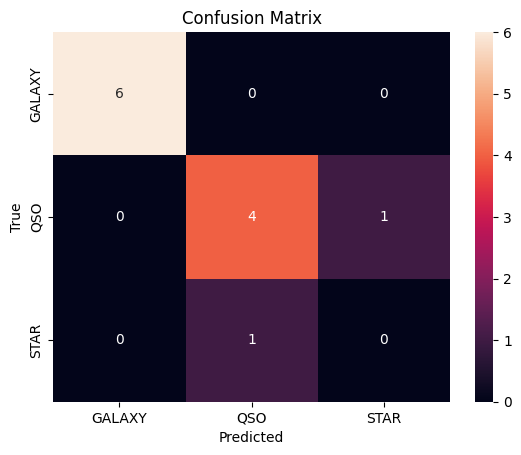

Model saved to ./code/spectral_classifier.joblib
Model loaded from ./code/spectral_classifier.joblib


In [40]:
# Fetching spectral data for galaxies, quasars, and stars
galaxy_sa = spectral_analysis(query="SELECT TOP 20 * FROM SpecObj WHERE class = 'GALAXY'")
qso_sa = spectral_analysis(query="SELECT TOP 20 * FROM SpecObj WHERE class = 'QSO'")
star_sa = spectral_analysis(query="SELECT TOP 20 * FROM SpecObj WHERE class = 'STAR'")

# Creating an instance of spectral_classification for training
class_sa = spectral_classification(galaxy_sa, qso_sa, star_sa)


When running in the jupyter notebook, the fits files must be donwloaded first. The trained model with 1500 Objects has been saved in the `spectral_classifier.joblib` file. The confusion matrix is in the API_draft folder. 

### Making predictions

In [43]:
# Loading a trained model

# Fetching new data for prediction (replace query with actual data query)
predict_data_sa = spectral_analysis(query="SELECT TOP 10 * FROM SpecObj WHERE class = 'Galaxy'")
predict_sa = spectral_classification(predict_data_sa, predict=True)

# Preparing data for prediction
predict_sa.predict(predict_sa.X)


No spectral data found for Plate=266, FiberID=12, MJD=51630
An error occurred: Spectra data is missing or empty.
Model loaded from ./code/spectral_classifier.joblib
Model loaded from ./code/spectral_classifier.joblib
[0 1 2 2 2 2 1 0]


## Interactive Visualization Usage Example

Visualization is key in astronomy for a better understanding of data. Our package offers interactive visualization tools like `SpectrumPlotter` and `FeatureVisualizer`.

### Using `SpectrumPlotter`

Interactive plotting of spectral data is made easy with `SpectrumPlotter`. You can plot raw spectral data or customize it as per your needs:

#### Instantiate `SpectrumPlotter`

In [29]:
# Fetch data using SDSSDataFetcher()
sdss_fetcher = SDSSDataFetcher()
adql_query = "SELECT TOP 20 * FROM SpecObj WHERE ra < 10 AND dec > 0"
results_adql = sdss_fetcher.fetch_by_adql(adql_query)

# Convert the Astropy `Table` to a Pandas `DataFrame`
results_df = results_adql.to_pandas()

# Create a `SpecObj` based on what you want to plot
spec_obj = SpecObj(results_df.iloc[0])

# Extract metadata from the `spec_obj` to get wavelengths and fluxes
metadata = spec_obj.metadatas()

# Get wavelengths and fluxes
wavelengths = metadata.at[0, 'wavelength']
fluxes = metadata.at[0, 'flux']

In [30]:
# Instantiate SpectrumPlotter
spectrum_plotter = SpectrumPlotter(wavelengths, fluxes)

#### Using `plot_raw_spectrum`

In [31]:
# Plot raw spectral data
spectrum_plotter.plot_raw_spectrum(color='blue')

#### Using `plot_custom_spectrum`

In [32]:
# Scatter plot
spectrum_plotter.plot_custom_spectrum(plot_type='scatter')

In [33]:
# Line plot, customized line style
spectrum_plotter.plot_custom_spectrum(plot_type='line', line_style='dashed')

### Using `FeatureVisualizer`

Visualize the distribution of features in your spectral data using `FeatureVisualizer`:

In [34]:
# Fetching data
sdss_fetcher = SDSSDataFetcher()
adql_query = "SELECT TOP 20 specObjID, class, z, plate, mjd, fiberID, ra, dec FROM SpecObj WHERE class = 'GALAXY'"
results_adql = sdss_fetcher.fetch_by_adql(adql_query)

# Convert to DataFrame
if results_adql is not None:
    spectral_data_df = results_adql.to_pandas()
else:
    print("No data returned from query.")
    spectral_data_df = pd.DataFrame()

# Preprocess the data
preprocessor = preprocessing()
spectral_data_df = preprocessor.ditch_units(spectral_data_df)  # Assuming units need to be removed


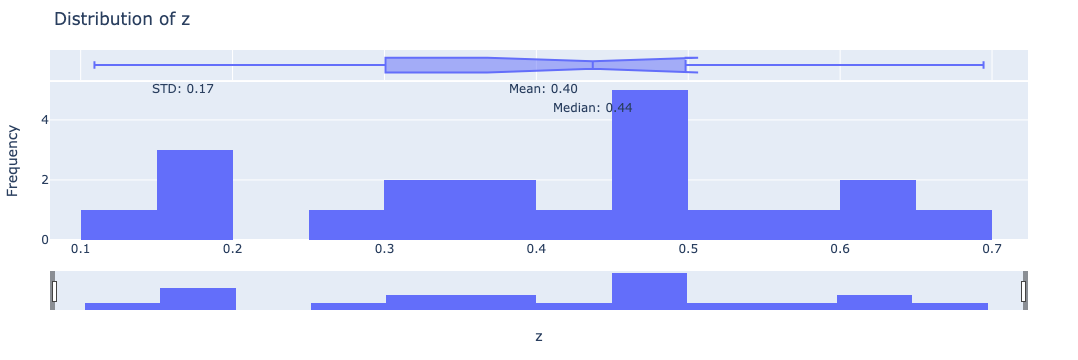

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

In [35]:
# Example: Visualize the distribution of redshift 'z'
if 'z' in spectral_data_df.columns:
    feature_visualizer = FeatureVisualizer(spectral_data_df)
    feature_visualizer.plot_feature_distribution('z', bins=20, show_stats=True)
else:
    print("Redshift data ('z') is not available in the dataset.")


## Concluding Remarks

We hope this package can help you with analyzing astronomical data. Have fun exploring the universe!